# Logistic Regression

### Steps:
- import libraries
- load dataset
- preprocess the data
- split the data
- train the logistic regression model
- test the model
- evaluate the model
- 10 fold cross validation
- store results

### Importing libraries and dataset

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve
import matplotlib.pyplot as plt
import random


In [2]:
# Import dataset
data = pd.read_csv('phishing_site_urls.csv')

### Preprocessing the data
- Converts the url label to binary numbers
- Creates 3 numerical features; url length, if https is used, and the number of special characters
- Creates columns for each feature and assigns 'X' to that data frame.
- Assigns 'y' to be the label values of the URL.

In [3]:
# Preprocessing the data
data['Label'] = data['Label'].map({'good': 0, 'bad': 1}) 
data['url_length'] = data['URL'].apply(len) 
data['contains_https'] = data['URL'].apply(lambda x: 1 if 'https' in x else 0) 
data['num_special_chars'] = data['URL'].apply(lambda x: sum([1 for char in x if char in '!@#$%^&*()'])) 
features = ['url_length', 'contains_https', 'num_special_chars']
X = data[features]
y = data['Label'] 

### Splitting the data
- Reserves 20% of the data for testing.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random.randint(0, 1000), stratify=y)

### Training the logistic regression model

In [5]:
logreg = LogisticRegression(max_iter=1000, random_state=random.randint(0, 1000))
logreg.fit(X_train, y_train)

### Evaluating the Model

In [ ]:
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

# Evaluating test set
test_accuracy = accuracy_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred)
test_roc_auc = roc_auc_score(y_test, y_pred_proba)
print("\nTest Set Evaluation:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"F1 Score: {test_f1:.4f}")
print(f"ROC AUC: {test_roc_auc:.4f}")

#Print Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Break havent evaluated the rest of this doc

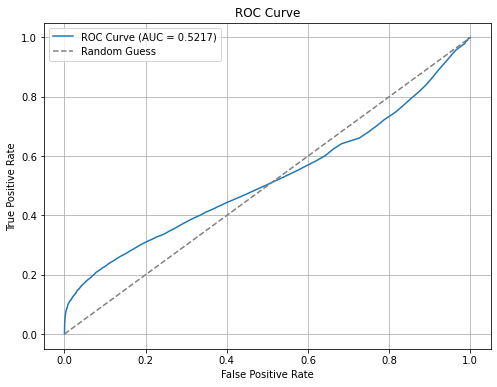

In [28]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {test_roc_auc:.4f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

Precision: The proportion of predicted positives (class 1 in your case) that are actually positive.

Class 0 (good): 0.73
Class 1 (bad): 0.88
Interpretation: The model is relatively precise for 1 (phishing), meaning most URLs it predicts as phishing are phishing. However, precision for 0 (good) is lower, meaning the model incorrectly labels some bad URLs as good.
Recall: The proportion of actual positives (class 1) that are correctly identified.

Class 0: 1.00
Class 1: 0.08
Interpretation: The model perfectly recalls all good URLs but struggles to identify phishing URLs (recall of only 8%). This indicates the model is biased toward predicting URLs as good.
F1-Score: The harmonic mean of precision and recall, balancing false positives and false negatives.

Class 0: 0.84
Class 1: 0.15
Interpretation: The F1 score for 0 is high, indicating balanced performance for non-phishing URLs. However, the F1 score for phishing URLs is very low due to poor recall.
Support: The number of occurrences of each class in the test dataset.

Class 0: 78,585 instances
Class 1: 31,285 instances
Interpretation: There is a class imbalance, with more good URLs (0) than phishing URLs (1).
Overall Metrics
Accuracy: 0.74

Interpretation: The model correctly classifies 74% of the total URLs. However, this is largely influenced by the high number of good URLs, which the model handles well.
Macro Average: The unweighted average of precision, recall, and F1 scores across classes.

Precision: 0.80
Recall: 0.54
F1-Score: 0.50
Interpretation: The macro average highlights the model's poor overall balance, as recall for class 1 significantly drags down the averages.
Weighted Average: The weighted average of metrics, taking class frequencies into account.

Precision: 0.77
Recall: 0.74
F1-Score: 0.65
Interpretation: The weighted averages are skewed toward the majority class (0), masking the poor performance on class 1.

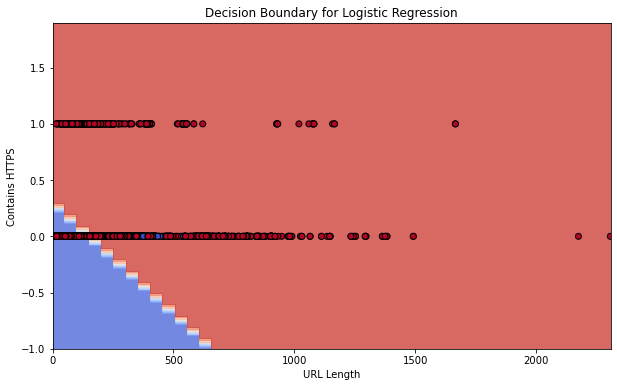

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Define a function to plot the decision boundary for two features
def plot_decision_boundary(X, y, model, feature1_idx, feature2_idx, feature1_name, feature2_name):
    # Create a mesh grid
    x_min, x_max = X[:, feature1_idx].min() - 1, X[:, feature1_idx].max() + 1
    y_min, y_max = X[:, feature2_idx].min() - 1, X[:, feature2_idx].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    
    # Predict on the grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel(), np.full(xx.ravel().shape, X[:, 2].mean())])
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundary
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, feature1_idx], X[:, feature2_idx], c=y, edgecolor='k', cmap=plt.cm.coolwarm)
    plt.xlabel(feature1_name)
    plt.ylabel(feature2_name)
    plt.title("Decision Boundary for Logistic Regression")
    plt.show()

# Prepare data for visualization (convert to NumPy array)
X_np = X.values
y_np = y.values

# Plot using two selected features
plot_decision_boundary(X_np, y_np, logreg, 
                       feature1_idx=0, feature2_idx=1, 
                       feature1_name='URL Length', feature2_name='Contains HTTPS')


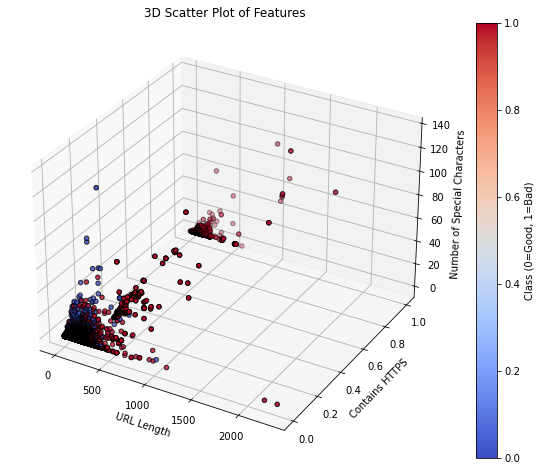

In [32]:
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot of the features
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter points
scatter = ax.scatter(X_np[:, 0], X_np[:, 1], X_np[:, 2], c=y_np, cmap=plt.cm.coolwarm, edgecolor='k')

# Label axes
ax.set_xlabel('URL Length')
ax.set_ylabel('Contains HTTPS')
ax.set_zlabel('Number of Special Characters')
ax.set_title('3D Scatter Plot of Features')

plt.colorbar(scatter, ax=ax, label="Class (0=Good, 1=Bad)")
plt.show()



In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import random

# Initialize logistic regression and accuracies list
logreg = LogisticRegression(max_iter=1000)
accuracies = []

# Perform multiple iterations with different random splits
for i in range(15):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random.randint(0, 1000))
    
    # Train the logistic regression model
    logreg.fit(X_train, y_train)
    
    # Predict and calculate accuracy
    y_pred = logreg.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"Logistic Regression Accuracy: {accuracy:.2f}")

# Save accuracies to CSV
df = pd.DataFrame({'lg': accuracies})
df.to_csv('LG_results.csv', index=False)


Logistic Regression Accuracy: 0.73
Logistic Regression Accuracy: 0.73
Logistic Regression Accuracy: 0.73
Logistic Regression Accuracy: 0.73
Logistic Regression Accuracy: 0.74
Logistic Regression Accuracy: 0.73
Logistic Regression Accuracy: 0.74
Logistic Regression Accuracy: 0.74
Logistic Regression Accuracy: 0.73
Logistic Regression Accuracy: 0.74
Logistic Regression Accuracy: 0.74
Logistic Regression Accuracy: 0.74
Logistic Regression Accuracy: 0.73
Logistic Regression Accuracy: 0.73
Logistic Regression Accuracy: 0.74
